In [1]:
#Hanfei Geng hgeng4

In [113]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from scipy import signal
print("Module imported")

Module imported


In [114]:
# Implement this function
def imadd(pic,brightness=50):
    # Add brightness to each pixel
    return pic + brightness


246
255


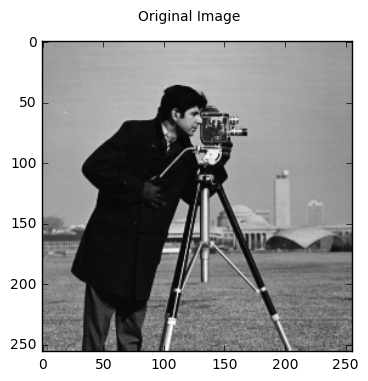

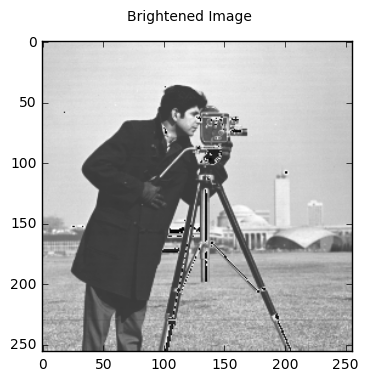

In [115]:
# Read the image
cameraman_origin = misc.imread('cameraman.tif')
# Create a copy of the origina image for us to manipulate
cameraman_bright = copy.deepcopy(cameraman_origin)
print(np.amax(cameraman_bright)-np.amin(cameraman_bright))

# Call imadd to perform enhancement
cameraman_bright = imadd(cameraman_bright,50)
print(np.amax(cameraman_bright)-np.amin(cameraman_bright))
# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('Brightened Image')
plt.imshow(cameraman_bright,cmap='gray',vmin = 0, vmax = 255)
plt.show()


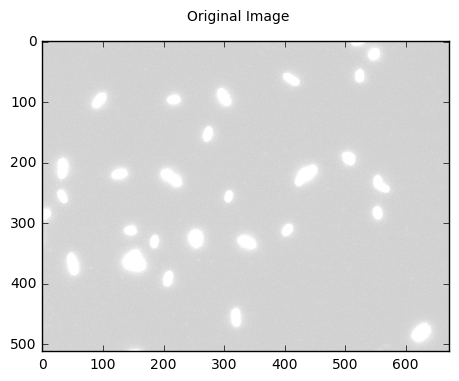

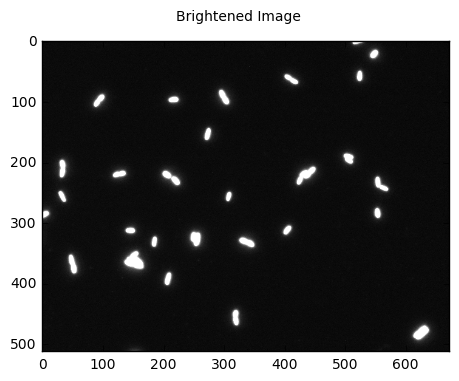

In [116]:
eco_origin = misc.imread('eco.tif')
# Create a copy of the origina image for us to manipulate
eco_bright = copy.deepcopy(eco_origin)

# Call imadd to perform enhancement
eco_bright = imadd(eco_bright,-200)


# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(eco_origin,cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('Brightened Image')
plt.imshow(eco_bright,cmap='gray',vmin = 0, vmax = 255)
plt.show()


In [117]:
def histeq(pic):
    hist, bins = np.histogram(pic, bins = np.arange(201,2597))
    cmap = ((hist.cumsum().astype('d')-1)*0.19047383764).astype('uint8')
    pic = np.interp(pic, bins[:-1], cmap)
    return pic

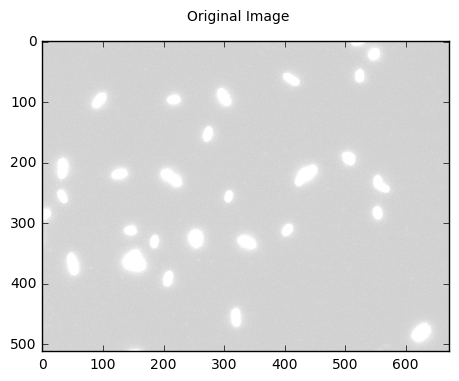

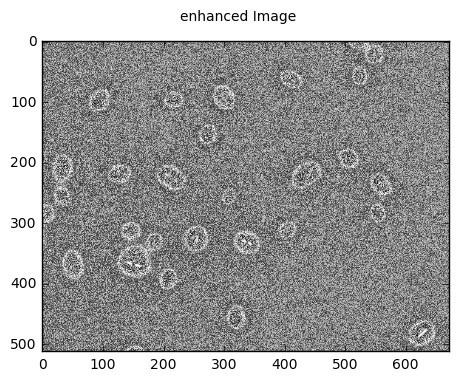

In [118]:
eco_origin = misc.imread('eco.tif')
# Create a copy of the origina image for us to manipulate
eco_bright = copy.deepcopy(eco_origin)

# Call imadd to perform enhancement
eco_bright = histeq(eco_bright)


# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(eco_origin,cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('enhanced Image')
plt.imshow(eco_bright,cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [119]:
# Gaussian Kernel Following the Descriptiong: 
# http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid')
        return None
    kernel = np.zeros((size,size))
    for x in range(size):
        for y in range(size):
            kernel[x][y] = np.exp(-((x-(size-1)/2)**2 \
                           +(y-(size-1)/2)**2)/(2*sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel


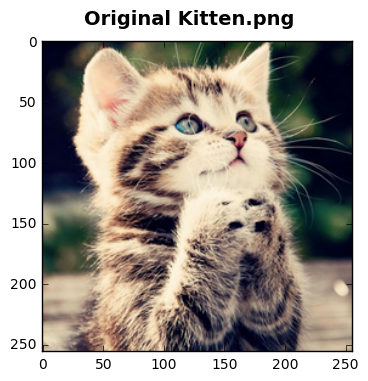

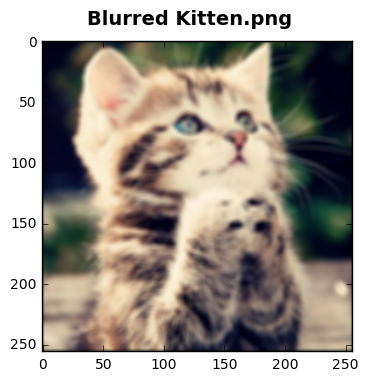

In [120]:
# Read Image and Display
kitten_origin = misc.imread('kitten.png')
# Create a copy of the origina image for us to manipulate
kitten_blur = copy.deepcopy(kitten_origin)


# Generate Kernel
kernel = gengaussian(sigma = 10000)

# Apply Convolution Here!

kitten_blur[:,:,0] = signal.convolve2d(kitten_blur[:,:,0],kernel,mode = "same")
kitten_blur[:,:,1] = signal.convolve2d(kitten_blur[:,:,1],kernel,mode = "same")
kitten_blur[:,:,2] = signal.convolve2d(kitten_blur[:,:,2],kernel,mode = "same")


# Display Results
fig_kitten_origin = plt.figure(1)
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_origin,vmin = 0, vmax = 255)
fig_kitten_blur = plt.figure(2)
fig_kitten_blur.suptitle('Blurred Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur,vmin = 0, vmax = 255)
plt.show()